## 3.7 tensorflow_datasets 패키지

텐서플로에서 예제 데이터는 tensorflow_datasets라는 별도의 패키지로 분리되어 있다. 


* https://www.tensorflow.org/datasets


따라서 패키지 설치도 별도로 해야한다. tensorflow 패키지는 미리 설치되어 있어야 한다.

```
pip install tensorflow-datasets
```

보통 `tfds`라는 이름으로 임포트한다. 

In [1]:
import tensorflow_datasets as tfds

tensorflow_datasets 패키지는 다음과 같은 함수를 제공한다.

* `list_builders()`: 데이터 목록 출력
* `load()`: 데이터 로드

`list_builders()` 함수로 전체 데이터 목록을 볼 수 있다. 각 데이터에 대한 세부적인 내용은 카탈로그 웹사이트에서 확인할 수 있다.

* https://www.tensorflow.org/datasets/catalog/overview

In [2]:
tfds.list_builders()

['abstract_reasoning',
 'aflw2k3d',
 'amazon_us_reviews',
 'bair_robot_pushing_small',
 'bigearthnet',
 'binarized_mnist',
 'binary_alpha_digits',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_corrupted',
 'clevr',
 'cnn_dailymail',
 'coco',
 'coco2014',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eurosat',
 'fashion_mnist',
 'flores',
 'food101',
 'gap',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imdb_reviews',
 'iris',
 'kitti',
 'kmnist',
 'lfw',
 'lm1b',
 'lsun',
 'mnist',
 'mnist_corrupted',
 'moving_mnist',
 'multi_nli',
 'nsynth',
 'omniglot',

### `load()` 함수

개별 데이터는 `load()` 함수로 로드한다. 반환된 데이터는 `tf.data.Dataset` 클래스 객체다. `load()` 함수의 사용법은 다음과 같다.

* https://www.tensorflow.org/datasets/api_docs/python/tfds/load

```
load(
    name,
    split=None,
    shuffle_files=None,
    as_supervised=False,
    with_info=False,
)
```

* `name`: 목표 데이터의 이름.`list_builders()` 함수의 결과 중 하나.
* `split`: `None`이면 모든 TRAIN, TEST 데이터를 딕셔너리로 반환한다. 
* `shuffle_files`: `True`면 데이터를 무작위로 섞는다.
* `as_supervised`: `True`면 데이터를 (input, label) 튜플 형태로 반환한다. `False`면 데이터를 딕셔너리 형태로 반환한다.
* `with_info`: `True`면 `DatasetInfo` 객체를 추가로 반환한다.



`load()` 함수는 내부적으로 다음 세 가지 작업을 순차적으로 실시한다.

1. 주어진 `name`에 대응하는 `tfds.core.DatasetBuilder` 객체를 생성한다.
2. `tfds.core.DatasetBuilder` 객체의 `download_and_prepare()` 메서드를 호출하여 데이터를 다운로드 받는다.
3. `as_dataset()` 메서드로 데이터를 반환한다.


### MINIST 이미지 데이터셋

예를 들어 `name="mnist"` 인수로 MNIST 이미지 데이터셋을 로드해보자. 다음 코드는 학습용 데이터와 검사용 데이터를 가진 딕셔너리를 출력한다.

In [3]:
data = tfds.load("mnist", shuffle_files=False, as_supervised=False)
data.keys()

dict_keys(['test', 'train'])

In [4]:
train_data, test_data = data["train"], data["test"]

`tfds.Split` 객체를 사용하면 튜플로 바로 출력할 수도 있다.

In [5]:
train_data, test_data = tfds.load(
    "mnist", 
    split=(tfds.Split.TRAIN, tfds.Split.TEST), 
    shuffle_files=False, as_supervised=False)

`tf.data.Dataset` 클래스 객체는 복수의 내부 컴포넌트를 가진다. 각 컴포넌트의 자료형과 크기는 `output_types`, `output_shapes` 속성으로 볼 수 있다.

In [6]:
train_data.output_types

{'image': tf.uint8, 'label': tf.int64}

In [7]:
train_data.output_shapes

{'image': TensorShape([28, 28, 1]), 'label': TensorShape([])}

`tf.data.Dataset` 클래스 객체에서 데이터를 가져오려면 `batch()` 메서드로 한 번에 가져올 데이터의 수를 정하고 `iter()` 함수로 이터레이터를 만들어 데이터를 가져와야 한다.

In [8]:
data = []
iterator = iter(train_data.batch(2))
data.append(next(iterator))
data.append(next(iterator))
data.append(next(iterator))

위 코드에서는 data[0], data[1], data[2]에 각각 2개씩의 이미지 데이터와 라벨 데이터가 `Tensor` 자료형으로 들어간다. 각 이미지 데이터는 28x28 해상도의 흑백 이미지이므로 모양은 2x28x28x1이 된다. 

In [9]:
data[0].keys()

dict_keys(['image', 'label'])

In [10]:
data[0]["image"].shape

TensorShape([2, 28, 28, 1])

In [11]:
data[0]["label"].shape

TensorShape([2])

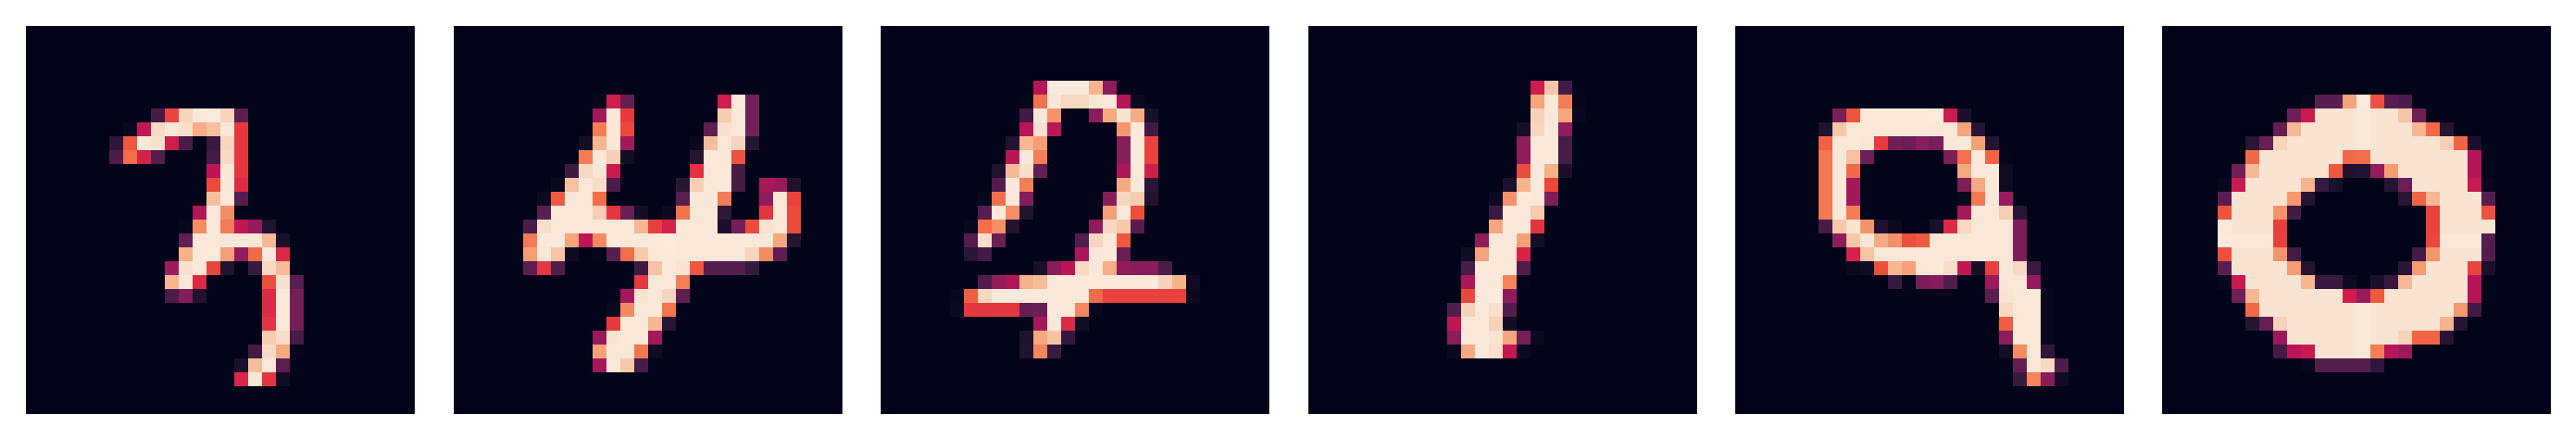

In [12]:
plt.figure(figsize=(10, 2))
for i in range(3):
    for j in range(2):
        plt.subplot(1, 6, 2 * i + j + 1)
        plt.imshow(data[i]["image"][j, :, :, 0])
        plt.axis("off")
plt.tight_layout()
plt.show()

라벨 데이터는 원핫인코딩이 되지 않은 상태다.

In [13]:
data[0]["label"].numpy(), data[1]["label"].numpy(), data[2]["label"].numpy()

(array([3, 4]), array([7, 1]), array([9, 0]))

###  IMDB 리뷰 데이터셋 

이번에는 텍스트 데이터인 IMDB 리뷰 데이터셋을 로드해보자. `tfds.Split.TRAIN.subsplit` 메서드를 사용하면 학습용 데이터를 다시 나누어 출력할 수도 있다.

In [14]:
(train_data, validation_data), test_data = tfds.load(
    name="imdb_reviews", 
    split=(tfds.Split.TRAIN.subsplit([6, 4]), tfds.Split.TEST),
    as_supervised=True)

10개의 학습용 데이터를 살펴보자.

In [15]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

문자열 데이터가 바이트열로 들어가 있기 때문에 `decode()` 메서드로 문자열로 변환해야 한다.

In [16]:
train_examples_batch[0].numpy().decode("utf-8") 

"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a cliché, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story penned by a journalist rather than a novelist. It's not really Dickens

감성분석용 데이터이므로 라벨은 0 또는 1이라는 값을 가진다.

In [17]:
train_labels_batch

<tf.Tensor: id=783, shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])>